A learning rate call: You can think of learning rate as an extra peice of functionality you can add to your model while its training

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#creating a data set.

from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [3]:
X.shape, y.shape

((1000, 2), (1000,))

In [4]:
#Splitting data set into train test split.

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [6]:
#set random seed.

tf.random.set_seed(42)

In [7]:
# create a model.

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(4, activation = "relu"),
                             tf.keras.layers.Dense(4, activation = "relu"),
                             tf.keras.layers.Dense(1, activation  = "sigmoid")
                             ])

In [8]:
#compile the model.

model.compile(loss = "BinaryCrossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])

In [9]:
#create a learning rate call back.

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [10]:
#fit the model

history = model.fit(X_train, y_train,
                    epochs = 100,
                    callbacks = [lr_scheduler],
                    verbose = 0)

In [11]:
#Function for decision boundary plot.

def plot_decision_boundary(model, x, y):


    #define the axis boundary of a plot and create a mesh grid
    x_min, x_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1
    y_min, y_max = x[:,1].min() - 0.1, x[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    #create x values, we are going to predict on all of these values
    x_in = np.c_[xx.ravel(), yy.ravel()]

    #make predictions using model.
    y_pred = model.predict(x_in)

    #checking for multi class

    if len(y_pred[0]) > 1:
        print("doing multiclass classification")

        #we have to reshape our predictions to make them ready for plotting.

        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)

    else:
        print("doiing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    #plot decission bouundary

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(x[:, 0], x[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


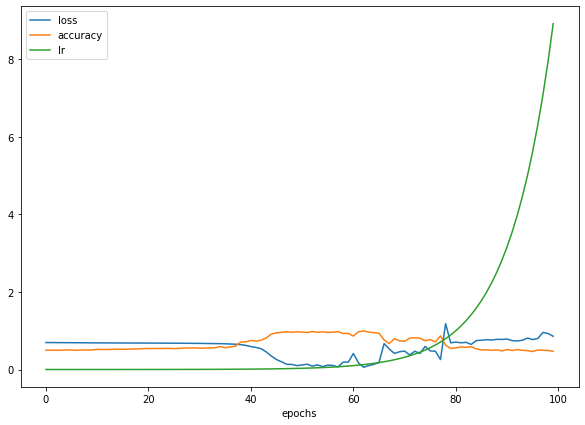

In [12]:
#check out the history

pd.DataFrame(history.history).plot(figsize = (10, 7),
                                   xlabel = "epochs")

As we can see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuraccy goes up (and loss goes down) at a specific point when the lr slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log scale learning rate.

Text(0.5, 1.0, 'Learning rate vs loss')

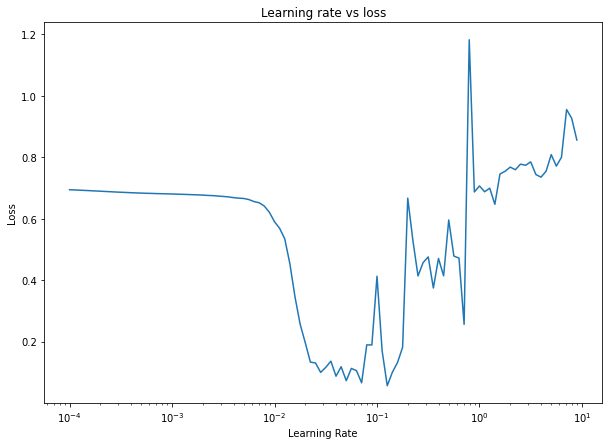

In [13]:
#plot the learning rate versus the loss.

lrs = 1e-4*(10 ** (np.arange(100)/20))
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history.history["loss"]) #we want the x-axis(learning rate) to be log scale.

plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

After determing the actual lr we can create the model with same determined learning rate with less number of epochs.

In [14]:
#set the random seed.

tf.random.set_seed(42)

#create model.

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [15]:
#compile the model.

model_2.compile(loss = 'BinaryCrossentropy',
                optimizer = tf.keras.optimizers.Adam(lr = 0.02),
                metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
#fit the model.

history_2 = model_2.fit(X_train, y_train, epochs = 20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [17]:
#evaluate our model.

model_2.evaluate(X_test, y_test)

7/7 [==============================] - 1s 3ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

doiing binary classification
doiing binary classification


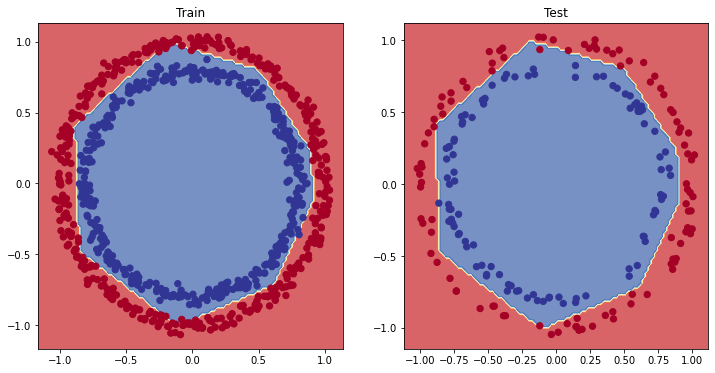

In [18]:
#plot the decision boundary for training set and test set.

plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_2, X_test, y_test)
plt.show()

More classification evaluation methods.

- Alongside the visualization we've been making there are no. of different evaluation metrics we can use to evaluate our classification models.

# Metrics name/ Evaluation method:

1. Accuracy - Out of 100 predictions, how many does your model get correct? Example: 95% accuracy means it get 95/100 predictions correct.

2. Precision- Proportion of True positives over total number of samples. Higher precision leads to less false positives(model predtics 1 when it should've been 0)

3. Recall: Proportion of True positives over total number of true positives and false negatives(model preditcs 0 when it should've been 1). Higher recall leads to less false negative.

4. F1-score: Combine precision and Recall into one metric. 1 is best, 0 is worst.

5. Confusion matrix: Compare the predicted values with true values in a tabular way. If 100% correct, all values in the matrix wiil be top left to the bottom right(diagnol line).

6. Classification Report: Collection of some of the main classification metrics such as precision, recall and f1-score.

In [19]:
#chcek the accuracy of our model.

loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"model loss on the test set: {loss}")
print(f"model accurcay on the test set: {(accuracy * 100): .2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
model loss on the test set: 0.05740184709429741
model accurcay on the test set:  99.00%


In [20]:
#create a confusion matrix.

from sklearn.metrics import confusion_matrix

#make predictions

y_pred = model_2.predict(X_test)

In [21]:
#create confusion matrix.

confusion_matrix(y_test, y_pred)

ValueError: ignored

In [22]:
y_pred[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

In [23]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

We need to get our predictions into binary format(0 or 1) but you might be wondering, what format they are currently in?

 They are in a form called prediction probalilities. You will see this often with the o/p of neural network. Often they wont be exact values but more a probability of how likely they are to be one value or another.

So one of the steps you will often see after making predictions with a neural n/w is converting a prediction probabilites into labels. 

In our case, since our ground truth labels(y_test) are in binary (0, 1), we can convert the prediction probabilites using to their binary form using tf.round().

In [24]:
#convert prediction probabilites to binary format and view the first 10.

tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [25]:
#create a confusion matrix.

confusion_matrix(y_test, tf.round(y_pred))

array([[99,  2],
       [ 0, 99]])

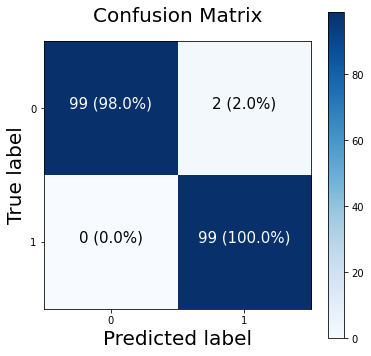

In [69]:
#Lets make our confusion matrix visual.

import itertools 
figsize = (6, 6)

cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize = figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)